<div style="text-align: right;">
<a target="_blank" href="https://colab.research.google.com/github/hkaragah/hkaragah.github.io/blob/main/structure/cant_col_p_delta.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
</div>

# P-Delta Analysis: Cantilever Column

In a P–Δ analysis of a cantilever column, the additional moments produced by the lateral deflection under the compressive load should be accounted for. This, in turn, further increases the deflection—a phenomenon that must be solved iteratively. 

<img src="../assets/img/structure/cant_col_p_delta/cant_col_p_delta_rendered_image.png" alt="Define load pattern" width=200>

Here, the P-Delta analysis is performed on a steel cantilever column (the AISC 360-22 benchmark problem case 2) by developing and solving the closed-form equation. The equation is then solved using an iterative approach. The result is then compared with the those obtained by using SciPy solver as well as structural analysis software. 


Below is a step‐by‐step outline of the iterative process of analyzing for P-Delta:
<br></br>

1. __Initial Analysis (Ignoring $P\Delta$ Effects)__

Assume Small Deflections:
Start by calculating the lateral deflection, $\Delta^{(0)}$, due solely to the applied lateral load, $H$. In this initial “linear” step, any secondary effects from the axial load $P$ is ignored. For a cantilever column, the basic deflection (from bending alone) can be estimated using:

$$\Delta^{(0)}=\frac{HL^3}{3EI}$$

where 
* $L$ is the height of the column, 
* $E$ is the elastic modulus, and 
* $I$ is the moment of inertia about the bending axis.
<br></br>

2. __Determine Secondary Moment__

Once the initial deflection is obtained, the additional moment caused by the axial load acting through the lateral deflection is computed as:

$$M_{P\Delta}=P\Delta^{(0)}$$

where $P$ is the axial compressive force acting the free-end of the column. This moment is “secondary” because it arises from the displacement itself and effectively increases the moment acting on the structure.
<br></br>

3. __Update Deflected Shape__

The $M_{P\Delta}$ is incorporated into the equilibrium equations to obtain a new estimate for the deflection. The structure’s stiffness is effectively reduced due to this additional moment. In many formulations, the differential equation governing the deflection of the column is modified to include the effect of $P$, leading to a “geometric stiffness” term.
For example, the _Euler-Bernoulli beam theory_ may be used to write the differential equation as:

$$EI\frac{d^2v(x)}{dx^2}=-M(x)$$

where
* $v(x)$ represents the lateral displacement along the column, and
* $M(x)$ represents the internal moment which is a function of $M_{P\Delta}$.

<br></br>

4. __Interative Process__

Since the free-end deflection $\Delta$ affects the moment $P\Delta$ and vice versa, the following steps are performed iteratively:

1. Compute $\Delta$: Start with the initial deflection, $\Delta^{(0)}$, from the linear analysis.

2. Calculate the secondary moment: $M_{P\Delta}=P\Delta$.

3. Solve the updated deflection equation: Re-compute $\Delta$ using the modified equilibrium that includes $M_{P\Delta}$.

4. Check Convergence: Compare the new deflection with the previous iteration. If the difference is below a predefined tolerance, the process converges. Otherwise, update $\Delta$ and repeat.

This process ensures that the nonlinear interaction between the axial load and the lateral displacement is properly captured.

---

## Deflected Shape Due to Lateral Load and P-Delta Effect

The deflected shape of a cantilever column under axial gravity loads and a lateral notional load is computed through an iterative process. Assume at $k$-th iteration, the drift at free-end of the column is $\Delta^{(k)}$ and the total moment at the column base is $M^{(k)}$. The governing equation is then defined in the form of the following ODE:

$$
\begin{cases}
EI\frac{d^2v}{dx^2}=-M^{(k)}(x)\\
\\
M^{(k)}(x)=-H(L-x)-P(\Delta^{(k)}-v)\\
\end{cases}
$$

where:
* $M^{(k)}(x)$ is the internal moment after $k$-th iterations
* $v$ is the deflected shape which is a function of $x$
* $P$ is the axial compressive load
* $H$ is the lateral load
* $L$ is the height of the column
* $\Delta^{(k)}$ is the drift at the column's free end after $k$-th iterations
* $E$ is the elastic modulus of the column's material
* $I$ is the moment of inertia of the column about the axis of bending

The ODE is re-written as:

$$EI\frac{d^2v}{dx^2}=H(L-x)+P(\Delta^{(k)}-v)$$
$$\frac{d^2v}{dx^2}+\frac{P}{EI}v=\frac{H}{EI}(L-x)+\frac{P}{EI}\Delta^{(k)}$$
$$\frac{d^2v}{dx^2}+\lambda^2v=f(x)$$

where:
* $\lambda^2 = \frac{P}{EI}$
* $f(x)=\frac{HL+P\Delta^{(k)}}{EI}-\frac{H}{EI}x$

<br></br>

__Step 1: Solve Homogeneous Equation__

The homogeneous part of the equation is:

$$\frac{d^2v}{dx^2}+\lambda^2v=0$$

The characteristic equation is:

$$r^2+\lambda^2=0 \rightarrow r=\pm i\lambda$$

Thus, the general solution to the homogeneous equation is:

$$v_h(x)=C_1\cos(\lambda x)+C_2\sin(\lambda x)$$

<br></br>

__Step 2: Solve Particular Solution__

The nonhomogeneous term is:

$$f(x)=\frac{HL+P\Delta^{(k)}}{EI}-\frac{H}{EI}x$$

Since this is a linear function of $x$, we assume a particular solution of the form:

$$v_p=A+Bx$$

Substituting into the ODE:

$$EI\cdot0+\lambda^2(A+Bx)=\frac{HL+P\Delta^{(k)}}{EI}-\frac{H}{EI}x$$

Equating coefficients,

$$
\begin{cases}
\lambda^2A=\frac{HL+P\Delta^{(k)}}{EI} &\rightarrow A=\frac{HL+P\Delta^{(k)}}{P}\\
\\
\lambda^2Bx=-\frac{H}{EI}x &\rightarrow B=-\frac{H}{P}\\
\end{cases}
$$

Thus, the particular solution is:

$$v_p=\frac{HL+P\Delta^{(k)}}{P}-\frac{H}{P}x$$

<br></br>

__Step 3: General Solution__

The general solution is:

$$v(x)=C_1\cos(\lambda x)+C_2\sin(\lambda x)+\frac{HL+P\Delta^{(k)}}{P}-\frac{H}{P}x$$

<br></br>

__Step 4: Apply Boundary Conditions__

* Condition 1: $v\bigg|_{x=0}=0$

$$C_1\cos(0)+C_2\sin(0)+\frac{HL+P\Delta^{(k)}}{P}-\frac{H}{P}(0)=0$$
$$C_1+\frac{HL+P\Delta^{(k)}}{P}=0$$
$$C_1=-\frac{HL+P\Delta^{(k)}}{P}$$

* Condition 2: $\frac{dv}{dx}\bigg|_{x=0}=0$

$$\frac{dv}{dx}=-C_1\lambda\sin(\lambda x)+C_2\lambda\cos(\lambda x)-\frac{H}{P}$$
$$-C_1\lambda\sin(0)+C_2\lambda\cos(0)-\frac{H}{P}=0$$
$$C_2\lambda-\frac{H}{P}=0$$
$$C_2=\frac{H}{P\lambda}$$

<br></br>

__Step 5: Solution__

The final solution is obtained by adding the homogeneous and particular parts:

$$v(x)=-\frac{HL+P\Delta^{(k)}}{P}\cos(\lambda x)+\frac{H}{P\lambda}\sin(\lambda x)+\frac{HL+P\Delta^{(k)}}{P}-\frac{H}{P}x$$

the deflection at the free-end ($x=L$) is

$$v(L)=-\frac{HL+P\Delta^{(k)}}{P}\cos(\lambda L)+\frac{H}{P\lambda}\sin(\lambda L)+\Delta^{(k)}$$

The critical buckling load for the column is

$$P_{cr}=\frac{\pi^2EI}{(2L)^2}$$

So the ratio of the applied axial load, $P$, to the critical buckling load is defined as

$$\frac{P}{P_{cr}}=\frac{P}{\frac{\pi^2EI}{(2L)^2}}=\frac{4PL^2}{\pi^2EI}=\frac{4}{\pi^2}\lambda^2 L^2$$

Re-arranging the above equation result in

$$\theta=\lambda L=\frac{\pi}{2}\sqrt{\frac{P}{P_{cr}}}$$

Now, the free-end deflection can be defined in terms of $\theta$

$$v(L)=-\frac{HL+P\Delta^{(k)}}{P}\cos(\theta)+\frac{H}{P\lambda}\sin(\theta)+\Delta^{(k)}$$

<br></br>

__Step 6: Additional Boundary Condition__

There is an additional boundary condition:

$$M(x)\bigg|_{x=L}=0$$

At the end of the iterative process this boundary condition may be satified if the columns is stable and the process converges to a solution.
<br></br>

__Step 7: Convergency__

To find the convergency consition, let's simplify the equation obtained for the deflection by substituting the $\cos$ and $\sin$ terms for the first two terms of their tylor expansions:

$$\cos(\lambda x)=1-\frac{(\lambda x)^2}{2!}+ ...$$
$$\sin(\lambda x)=\lambda x-\frac{(\lambda x)^3}{3!}+ ...$$

After the substitution, the deflection at $x=H$ (free-end) after $k+1$ iterations is approximated as:

$$
\begin{align*}
\Delta^{(k+1)}=v(L)&\approx-\left(\frac{HL}{P}+\Delta^{(k)}\right)\left(1-\frac{\lambda^2 L^2}{2}\right)+\frac{L}{P\lambda}\left(\lambda L-\frac{\lambda^3 L^3}{6}\right)+\Delta^{(k)}\\
\\
&\approx-\frac{HL}{P}-\Delta^{(k)}+\frac{HL}{P}\frac{\lambda^2 L^2}{2}+\Delta^{(k)}\frac{\lambda^2 L^2}{2}+\frac{H}{P}L-\frac{H}{P}\frac{\lambda^2 L^3}{6}+\Delta^{(k)}\\
\\
&\approx\frac{HL}{P}\frac{\lambda^2 L^2}{2}+\Delta^{(k)}\frac{\lambda^2 L^2}{2}-\frac{H}{P}\frac{\lambda^2 L^3}{6}\\
\\
&\approx\frac{HL}{P}\frac{(P/EI) L^2}{2}+\Delta^{(k)}\frac{(P/EI) L^2}{2}-\frac{H}{P}\frac{(P/EI) L^3}{6}\\
\\
&\approx\frac{H}{3EI}L^3+\frac{P\Delta^{(k)}}{2EI}L^2\\
\end{align*}
$$

Let's use the above approximation to compute the free-end drift for the first few iterations:

$$
\begin{align*}
\Delta^{(0)}&=0\\
\\
\Delta^{(1)}&=\frac{H}{3EI}L^3 + 0\\
\\
\Delta^{(2)}&=\frac{H}{3EI}L^3 + \frac{P\Delta^{(1)}}{2EI}L^2 = \Delta^{(1)} + \frac{P\Delta^{(1)}}{2EI}L^2 = \Delta^{(1)}\left(1+\frac{PL^2}{2EI}\right)\\
\\
\Delta^{(3)}&=\frac{H}{3EI}L^3 + \frac{P\Delta^{(2)}}{2EI}L^2 = \Delta^{(1)} + \frac{P\Delta^{(1)}\left(1+\frac{PL^2}{2EI}\right)}{2EI}L^2 = \Delta^{(1)}\left[1+\frac{PL^2}{2EI}+\left(\frac{PL^2}{2EI}\right)^2\right]\\
\\
...\\
\Delta^{(k+1)}&=\frac{H}{3EI}L^3 + \frac{P\Delta^{(k)}}{2EI}L^2 = \Delta^{(1)}\left[1+\frac{PL^2}{2EI}+\left(\frac{PL^2}{2EI}\right)^2 + ... + \left(\frac{PL^2}{2EI}\right)^k\right]=\Delta^{(1)}\sum_{i=0}^{k}\left(\frac{PL^2}{2EI}\right)^k\\
\end{align*}
$$

which is a geometric series. If $|\frac{PL^2}{2EI}|<1$, the terms of the series approaches zero, and the sequence of partial sums, $S_n$ converges to $\frac{\Delta^{(1)}}{1-\frac{PL^2}{2EI}}$.

Let's define some utility functions first to compute the deflection, moment, the critical buckling load.

In [1]:
import numpy as np
from scipy.integrate import solve_bvp

def first_order_deflection(Fh:float, L:float, E:float, I:float, n:int=100) -> tuple:
    x = np.linspace(0, L, n).reshape(1, -1) # shape: (1, n)
    y = (Fh / (6 * E * I)) * (2 * L **3 - 3 * L**2 * (L - x) + (L - x)**3)
    return x, y
    
    
def second_order_deflection(Fh:float, Fa:float, L:float, D:float, E:float, I:float, method:str, n:int=100) -> tuple:
    if method == "closed":
        return closed_form_deflection(Fh, Fa, L, D, E, I, n)
    elif method == "ode":
        return ode_form_deflection(Fh, Fa, E, I, L, D, n)
    else:
        raise ValueError("Method must be 'closed' or 'ode'")


def closed_form_deflection(Fh:float, Fa:float, L:float, delta_k:float, E:float, I:float, n:int=100) -> tuple:
    x = np.linspace(0, L, n).reshape(1, -1) # shape: (1, n)
    lambda_ = np.sqrt(Fa / (E * I))
    A = (Fh * L + Fa * delta_k) / Fa
    B = Fh / Fa
    y = -A * np.cos(lambda_ * x) + B / lambda_ * np.sin(lambda_ * x) + A - B * x # shape: (1, n)
    return x, y


def ode_form_deflection(Fh:float, Fa:float, E:float, I:float, L:float, delta_k:float, n:int=100) -> tuple:   
    def ode(x, y):
        """System of first-order ODEs. y[0] = v, y[1] = dv/dx"""
        return np.vstack([y[1], (Fh * (L - x) + Fa * (delta_k - y[0])) / (E * I)])
    
    def bc(ya, yb):
        """Boundary conditions: v(0) = 0, dv/dx(0) = 0"""
        return np.array([ya[0], ya[1]])
    
    x = np.linspace(0, L, n)
    y_guess = np.zeros((2, n))  # Initial guess
    sol = solve_bvp(ode, bc, x, y_guess)
    
    if not sol.success:
        raise RuntimeError("BVP solver did not converge.")   
    
    return sol.x.reshape(1,-1), sol.y[0].reshape(1,-1)  # x values and v(x)


def first_order_moment(Fh:float, L:float, n:int=100) -> tuple:
    x = np.linspace(0, L, n).reshape(1, -1) # shape: (1, n)
    M = -Fh * (L - x)
    return x, M


def second_order_moment(Fh:float, Fa:float, L:float, delta_k:float, E:float, I:float, method:str, n:int=100) -> tuple:
    x, y = second_order_deflection(Fh, Fa, L, delta_k, E, I, method, n=n)
    M = -Fh * (L - x) - Fa * (delta_k - y) # shape: (1, n)
    return x, M


def compute_2nd_order_drift(Fh:float, Fa:float, L:float, E:float, I:float, method:str, tol:float=1e-6, maxIter:int=100) -> np.ndarray:
    drifts = [0] # initial drift is zero
    x, y = first_order_deflection(Fh, L, E, I)
    drifts.append(y[0, np.argmax(x)]) # Add the first order drift to the list
    
    for _ in range(maxIter):
        x, y = second_order_deflection(Fh, Fa, L, drifts[-1], E, I, method)
        drifts.append(y[0, np.argmax(x)]) # Add the drift at free end to the drift list
        if abs(drifts[-1]-drifts[-2]) < tol:
            return np.array(drifts)
        
    raise ValueError("Failed to converge")


def euler_buckling(L:float, E:float, I:float, K:float) -> float:
    return (np.pi**2 * E * I) / (K * L)**2

Now, let's define the input parameters. For the P-Delta analysis, the AISC 360-22 benchmark problem case 2 (AISC 360-22: Figure C-C2.3) is considered. The structure is a cantilever W14x48 with a concentrated lateral and axial loads at the free-end.

In [2]:
# AISC 360-22: Figure C-C2.3 (Benchmark Problem Case 2)
# Cantilever column with P-Delta effects


nSEG = 100 # number of segments for the column
K = 2.0 # effective length factor for cantilever column

# W14X48
A = 14.1 # in^2, section area
d = 13.8 # in, depth of section
tw = 0.340 # in, web thickness
Aw = d * tw # in^2, web area
alphaY = Aw / A # shear shape factor along y-axis
bf = 8.03 # in, flange width
tf = 0.595 # in, flange thickness
Af = 2 * bf * tf # in^2, flange area
alphaZ = Af / (1.2 * A) # shear shape factor along z-axis
Avz = A # in^2, shear area (assumed equal to section area)
Avy = A
Iz = 484. # in^4, moment of inertia about strong axis
Iy = 51.4 # in^4, moment of inertia about weak axis
L = 28. * 12 # in, column height
E = 29000. # ksi, steel modulus of elasticity
nu = 0.3 # Poisson's ratio
G = E / (2 * (1 + nu)) # ksi, shear modulus of elasticity
J = 1.45 # in^4, torsional constant

# Applied Loads
Pu = 200 # kips, axial compression
print(f'Pu (axial load)= {Pu} kips')

Ni = 1 # kips, lateral load
print(f'Ni (lateral/notional load)= {Ni} kips')

Pu (axial load)= 200 kips
Ni (lateral/notional load)= 1 kips


The critical buckling load, first and second-order drifts and moments are as follows.

In [3]:
# Critical buckling load
print(f'PuL²/(2EI): {Pu*L**2/(2*E*Iz):.1f} < 1.0 (P-Delta should converge)')
Pcr = euler_buckling(L, E, Iz, K)
print(f'Pcr (critical load)= {Pcr:.1f} kips (P/Pcr = {Pu/Pcr:.2f})')

# First-order drift
x1, y1 = first_order_deflection(Ni, L, E, Iz, n=nSEG)
print(f'\nFirst-order drift at free end= {y1[0, np.argmax(x1)]:.4f} in')

# Second-order drift
drifts = compute_2nd_order_drift(Ni, Pu, L, E, Iz, method="closed")
x2, y2 = second_order_deflection(Ni, Pu, L, drifts[-1], E, Iz, method="closed", n=nSEG)
drift_ratio = y2[0, np.argmax(x2)] / y1[0, np.argmax(x1)]
print(f'Second-order deflection at free end= {y2[0, np.argmax(x2)]:.4f} in')
print(f"2nd-to-1st order drift ratio= {drift_ratio:.2f}")

# Base Moments
x1, M1 = first_order_moment(Ni, L, n=nSEG)
x2, M2 = second_order_moment(Ni, Pu, L, drifts[-1], E, Iz, method="closed", n=nSEG)
print(f'\nFirst-order moment at free end= {M1[0, np.argmin(x1)]:.1f} kip-in')
print(f'Second-order moment at free end= {M2[0, np.argmin(x2)]:.1f} kip-in')

PuL²/(2EI): 0.8 < 1.0 (P-Delta should converge)
Pcr (critical load)= 306.8 kips (P/Pcr = 0.65)

First-order drift at free end= 0.9009 in
Second-order deflection at free end= 2.5649 in
2nd-to-1st order drift ratio= 2.85

First-order moment at free end= -336.0 kip-in
Second-order moment at free end= -849.0 kip-in


Let's compute the lateral stiffness of the column with and without the P-Delta effect. The lateral stiffness without P-Delta is

$$K_{no\ P\Delta}=\frac{N_i}{\Delta^{(1)}}$$

:::{note}
The lateral stiffness without the P-Delta effect is the same as $\frac{3EI}{L^3}$.
:::

and with P-Delta effect is

$$K_{P\Delta}=\frac{N_i}{\Delta^{(n)}}$$


In [4]:
k_no_PD = Ni/y1[0, np.argmax(x1)]
k_PD = Ni/y2[0, np.argmax(x2)]

print(f'Lateral Stiffness (no P-Delta): {k_no_PD:.2f} kip/in')
print(f'Lateral Stiffness (P-Delta): {k_PD:.2f} kip/in')
print(f'{(k_no_PD - k_PD) / k_no_PD * 100:.0f}% reduction in lateral stiffness')

Lateral Stiffness (no P-Delta): 1.11 kip/in
Lateral Stiffness (P-Delta): 0.39 kip/in
65% reduction in lateral stiffness


The following figure shows how lateral stiffness reduces after each P-Delta iteration.

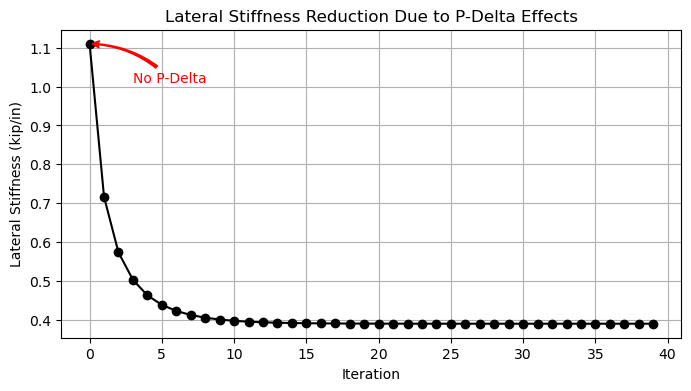

In [5]:
import matplotlib.pyplot as plt

stiffnesses = Ni / drifts[1:]
iterations = np.arange(len(stiffnesses))

plt.figure(figsize=(8, 4))
plt.plot(iterations, stiffnesses, 'ko-', label='Lateral Stiffness')
plt.annotate("No P-Delta", xy=(0, k_no_PD), xytext=(3, k_no_PD - 0.1),
             arrowprops=dict(arrowstyle="fancy,head_length=.5,head_width=.5,tail_width=.2", connectionstyle="arc3,rad=0.2", color="red"), fontsize=10, color='red')
plt.xlabel('Iteration')
plt.ylabel('Lateral Stiffness (kip/in)')
plt.title('Lateral Stiffness Reduction Due to P-Delta Effects')
plt.grid()
plt.show()

## Solve ODE
The governing ODE can be solved directly. The `solve_bvp` solver is used below to find the P-Delta drifts directly from the governing ODE. This way the colsed form equation can be verified.

As shown, the resulted drift after covergence is the same as the closed form method which verifies the colsed form solution.

In [6]:
drifts_ode = compute_2nd_order_drift(Ni, Pu, L, E, Iz, method="ode")
print(f'\nSecond-order deflection at free end (ODE method)= {drifts[-1]:.4f} in')


Second-order deflection at free end (ODE method)= 2.5649 in


In [7]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import plotly.graph_objects as go
# import numpy as np

# x = np.linspace(0, np.pi, 100).reshape(1, -1) # shape: (1, n)
# y = np.zeros_like(x, shape=(10, x.shape[1])) # shape: (10, n)
# D_min = Ni*L**3/(3*E*I)
# D_max = 1000 * D_min
# D = np.linspace(D_min, D_max, 100)
# Pu = (E * I * np.pi**2) / (L**2)

# X, D_mesh = np.meshgrid(x, D)
# Y = -(Ni * L / Pu + D_mesh) * np.cos(X) + (Ni / I) * np.sin(X) + D_mesh

# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(X, D_mesh, Y, cmap='viridis')

# # Add labels and title
# ax.set_xlabel('x')
# ax.set_ylabel('D')
# ax.set_zlabel('y')
# ax.set_title('3D Plot of y = -(Ni*L/Pu + D)*cos(x) + (Ni/I)*sin(x) + D')

# fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# plt.show()

# ####
# fig = go.Figure(data=[go.Surface(z=Y, x=X, y=D_mesh, colorscale='Viridis')])

# # Update layout for labels and title
# fig.update_layout(
#     title='Interactive 3D Plot of y = -(Ni*L/Pu + D)*cos(x) + (Ni/I)*sin(x) + D',
#     scene=dict(
#         xaxis_title='x',
#         yaxis_title='D',
#         zaxis_title='y'
#     ),
#     autosize=False,
#     width=800,
#     height=600
# )

# # Show the plot
# fig.show()


## Drift and Moment Diagrams

The following plots show the first and second order drift (left figure) and moment (right figure). The light grey curves illustrate the iterative drifts and moments after. The iterative drifts satify the boundary conditions because we explicitly enforced them when we formulate the governing ODE. However, the iterative moments do not necessarily satisfy the equilibrium (free-end moment is not zero) until the solution converges.

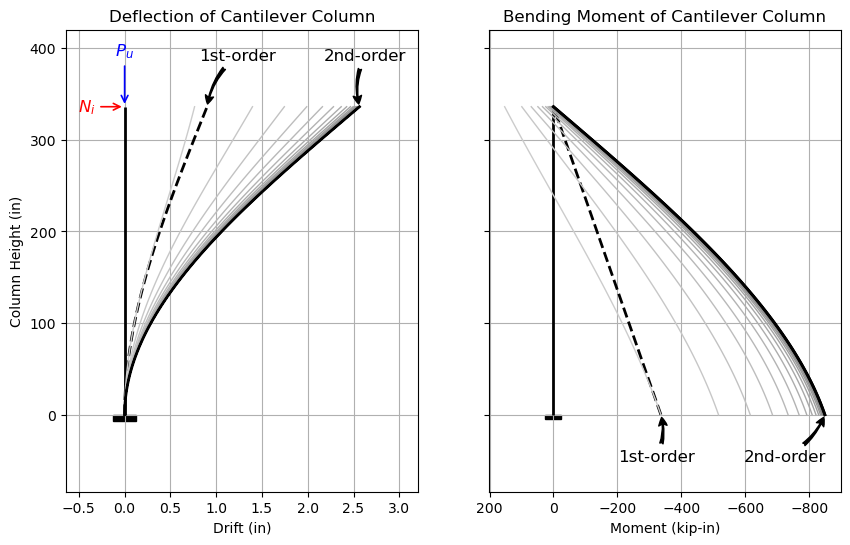

In [8]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 6))


ax[0].vlines(0, 0, L, color="black", linewidth=2)
ax[0].plot(y1.reshape(-1,1), x1.flatten(), color="black", linestyle="--", linewidth=2, label="First Order")
ax[0].annotate("1st-order", xy=(y1.max(), L), xytext=(0.9*y1.max(), 1.15*L), arrowprops=dict(arrowstyle="fancy,head_length=.5,head_width=.5,tail_width=.2", connectionstyle="arc3,rad=0.2", color="black"), fontsize=12, color="black")

colors = [str(g) for g in np.linspace(0.8, 0, len(drifts))]
for i in range(len(drifts)):
    x2, y2 = second_order_deflection(Ni, Pu, L, drifts[i], E, Iz, method="closed")
    linewidth = 2 if i == len(drifts)-1 else 1
    ax[0].plot(y2.reshape(-1, 1), x2.flatten(), color=colors[i], linewidth=linewidth)
ax[0].annotate("2nd-order", xy=(y2.max(), L), xytext=(0.85*y2.max(), 1.15*L), arrowprops=dict(arrowstyle="fancy,head_length=.5,head_width=.5,tail_width=.2", connectionstyle="arc3,rad=0.2", color="black"), fontsize=12, color="black")
ax[0].annotate(r"$N_i$", xy=(0, L), xytext=(-0.2*y2.max(), L), arrowprops=dict(arrowstyle="->", color="red", linewidth=1.2), fontsize=12, color="red", ha='left', va='center')
ax[0].annotate(r"$P_u$", xy=(0, L), xytext=(0, 1.15*L), arrowprops=dict(arrowstyle="->", color="blue", linewidth=1.2), fontsize=12, color="blue", ha='center', va='bottom')
ax[0].add_patch(plt.Rectangle((-0.05*y2.max(), -0.02*L), 0.1*y2.max(), 0.02*L, color="black"))

ax[0].set_xlabel("Drift (in)")
ax[0].set_ylabel("Column Height (in)")
ax[0].set_title("Deflection of Cantilever Column", fontsize=12)
ax[0].set_xlim(1.25*y2.max(), -0.25*y2.max())
ax[0].set_ylim(-0.25*L, 1.25*L)
ax[0].invert_xaxis()
ax[0].set_aspect('auto', adjustable='box')
ax[0].grid(True)

_, m1 = first_order_moment(Ni, L)

ax[1].vlines(0, 0, L, color="black", linewidth=2)
ax[1].plot(m1.reshape(-1, 1), x1.flatten(), color="black", linestyle="--", linewidth=2, label="First Order")
ax[1].annotate("1st-order", xy=(m1.min(), 0), xytext=(0.6*m1.min(), -0.15*L), arrowprops=dict(arrowstyle="fancy,head_length=.5,head_width=.5,tail_width=.2", connectionstyle="arc3,rad=0.2", color="black"), fontsize=12, color="black")

for i in range(len(drifts)):
    _, m2 = second_order_moment(Ni, Pu, L, drifts[i], E, Iz, method="closed")
    linewidth = 2 if i == len(drifts)-1 else 1
    ax[1].plot(m2.reshape(-1, 1), x2.flatten(), color=colors[i], linewidth=linewidth)
ax[1].plot(m2.reshape(-1, 1), x2.flatten(), color="black", linewidth=2)
ax[1].annotate("2nd-order", xy=(m2.min(), 0), xytext=(0.7*m2.min(), -0.15*L), arrowprops=dict(arrowstyle="fancy,head_length=.5,head_width=.5,tail_width=.2", connectionstyle="arc3,rad=0.2", color="black"), fontsize=12, color="black")
ax[1].add_patch(plt.Rectangle((-50 / 2, -5), 50, 5, color="black"))
ax[1].invert_xaxis()
ax[1].set_xlabel("Moment (kip-in)")
ax[1].set_title("Bending Moment of Cantilever Column", fontsize=12)
ax[1].set_aspect('auto', adjustable='box')
ax[1].grid(True)

plt.show()
    

In [9]:
import openseespy.opensees as ops
import vfo.vfo as vfo


ops.wipe()
ops.model('basic', '-ndm', 2, '-ndf', 3)

nSEG = 10
baseNodeTag = 0
nodeTags = [baseNodeTag]
ops.node(baseNodeTag, 0, 0) # Base node
for i in range(1, nSEG+1):
    nodeTag = i
    ops.node(nodeTag, 0, i*L/nSEG)
    nodeTags.append(nodeTag)

# Fixed base nodes
ops.fix(0, 1, 1, 1)

coordTransf = "PDelta"  # Linear, PDelta, Corotational
transfTag = 111
ops.geomTransf(coordTransf, transfTag)

# hf = 2 * tf
# ks = (6+6*(hf/d)*2)/(5+5*(hf/d)**2)
secTag = 230
ops.section('Elastic', secTag, E, A, Iz, G, alphaY)

intPoints = 5
intTag = 520
ops.beamIntegration('Lobatto', intTag, secTag, intPoints) # 'Lobatto', 'Legendre', 'NewtonCotes'

eleTags = []
for i in range(nSEG):
    eleTag = 1000 + i
    iNode = i
    jNode = i + 1
    # element('elasticBeamColumn', eleTag, iNode, jNode, secTag, transfTag, intTag)
    ops.element('forceBeamColumn', eleTag, iNode, jNode, transfTag, intTag)
    # element('dispBeamColumn', eleTag, iNode, jNode, transfTag, intTag)
    eleTags.append(eleTag)

# element("ElasticTimoshenkoBeam", 1002, 12, 22, 230, 110) # P-Delta is embedded in this element

timeSeriesTag = 1
ops.timeSeries("Linear", timeSeriesTag)

patternTag = 1
ops.pattern("Plain", patternTag, timeSeriesTag)

ops.load(nSEG, Ni, -Pu, 0)

ops.system('BandGen')
ops.numberer('Plain') # Plain, RCM, AMD
ops.constraints("Plain") # Plain, Transformation
ops.algorithm('Newton') # Linear, Newton, KrylovNewton, KrylovNewtonWithInertia, ...
ops.test('NormDispIncr', 1.0e-6, 10)

numIncr = 10
ops.integrator('LoadControl', 1.0/numIncr) # LoadControl, DisplacementControl, FixedNumIter

ops.analysis('Static') # Static, Transient, VariableTransient, PFEM

# ops.database('File', 'cant_col_p_delta')

ops.recorder('Node', '-file', 'node_disp.out', '-time', '-node', nodeTags[-1], '-dof', 1, 2, 3, 'disp')
ops.recorder('Node', '-file', 'reaction.out', '-time', '-node', nodeTags[0], '-dof', 1, 2, 3, 'reaction')
ops.recorder('Element', '-file', 'ele_force.out', '-time', '-ele', *eleTags, 'force')

vfo.createODB(model='cant_col_p_delta', loadcase='static')
ops.analyze(numIncr)

0

In [10]:
ops.printModel('node', 1)
ops.printModel('node', 2)

print("---forceBeamColumn (P-Delta)---")
print(f"Free end drift: {ops.nodeDisp(nodeTags[-1], 1):.3f} in")
print(f"Base shear: {ops.nodeReaction(nodeTags[0], 1):.3f} kips")
print(f"Base moment: {ops.nodeReaction(nodeTags[0], 3):.3f} kip-in\n")


---forceBeamColumn (P-Delta)---
Free end drift: 2.600 in
Base shear: -1.000 kips
Base moment: 855.924 kip-in




 Node: 1
	Coordinates  : 0 33.6 
	Disps: 0.0346535 -0.0164343 -0.00200044 
	 unbalanced Load: 0 0 0 
	 reaction: 3.14193e-14 -5.68434e-14 -2.27374e-13 
	ID : 0 1 2 


 Node: 2
	Coordinates  : 0 67.2 
	Disps: 0.134966 -0.0328687 -0.00388813 
	 unbalanced Load: 0 0 0 
	 reaction: -2.17604e-14 1.13687e-13 2.27374e-13 
	ID : 3 4 5 



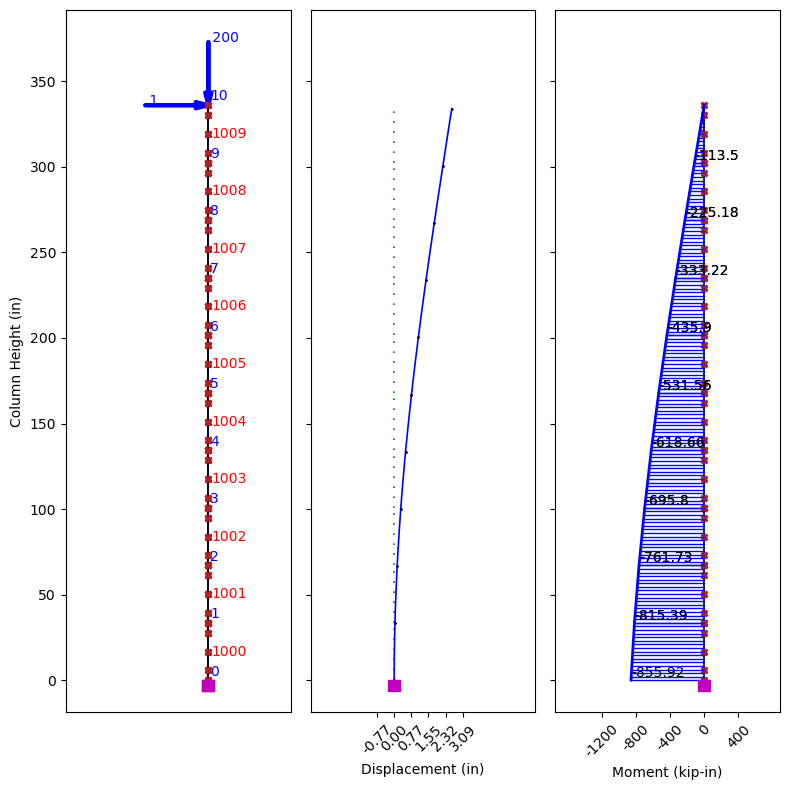

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import opsvis as opsv

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(8, 8))

# Plot undeformed model with loading
opsv.plot_model(ax=ax[0])
ax[0].set_ylabel("Column Height (in)")
ax[0].set_xticks([])
opsv.plot_load(ax=ax[0])

# Plot deformed model and get scale factor
def_sfac = opsv.plot_defo(ax=ax[1])
xticks = ax[1].get_xticks()
ax[1].xaxis.set_major_locator(ticker.FixedLocator(xticks))
ax[1].set_xticklabels([f"{tick / def_sfac:.2f}" for tick in xticks])
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_xlabel("Displacement (in)")

# Plot moment diagram
m_sfac = 0.05
opsv.section_force_diagram_2d(sf_type='M', sfac=m_sfac, ax=ax[2])
xticks = ax[2].get_xticks()
ax[2].xaxis.set_major_locator(ticker.FixedLocator(xticks))
ax[2].set_xticklabels([f"{tick / m_sfac:.0f}" for tick in xticks])
ax[2].tick_params(axis='x', labelrotation=45)
ax[2].set_xlabel("Moment (kip-in)")

plt.tight_layout()
plt.show()


Reading data from the cant_col_p_delta_ODB.


Widget(value='<iframe src="http://localhost:58752/index.html?ui=P_0x26dcbb1d040_0&reconnect=auto" class="pyvis…

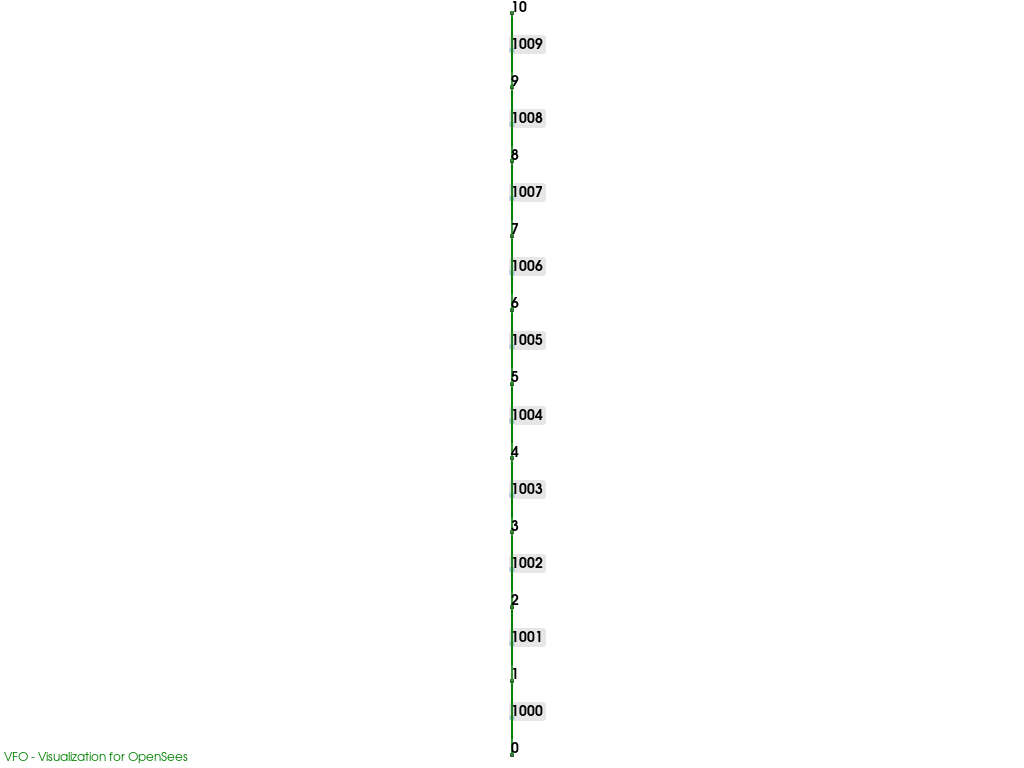

In [12]:
vfo.plot_model(
    model='cant_col_p_delta', 
    show_nodes="yes", 
    show_nodetags="yes", 
    show_eletags="yes", 
    font_size=14, 
    setview='3D', 
    elementgroups=None, 
    line_width=2, 
    filename='cant_col_p_delta')

from IPython.display import Image, display

display(Image(filename='cant_col_p_delta.png'))

Reading structure data from cant_col_p_delta_ODB.
Reading loadcase 'static' data from cant_col_p_delta_ODB.
Final deformed shape


Widget(value='<iframe src="http://localhost:58752/index.html?ui=P_0x26dcac67860_1&reconnect=auto" class="pyvis…

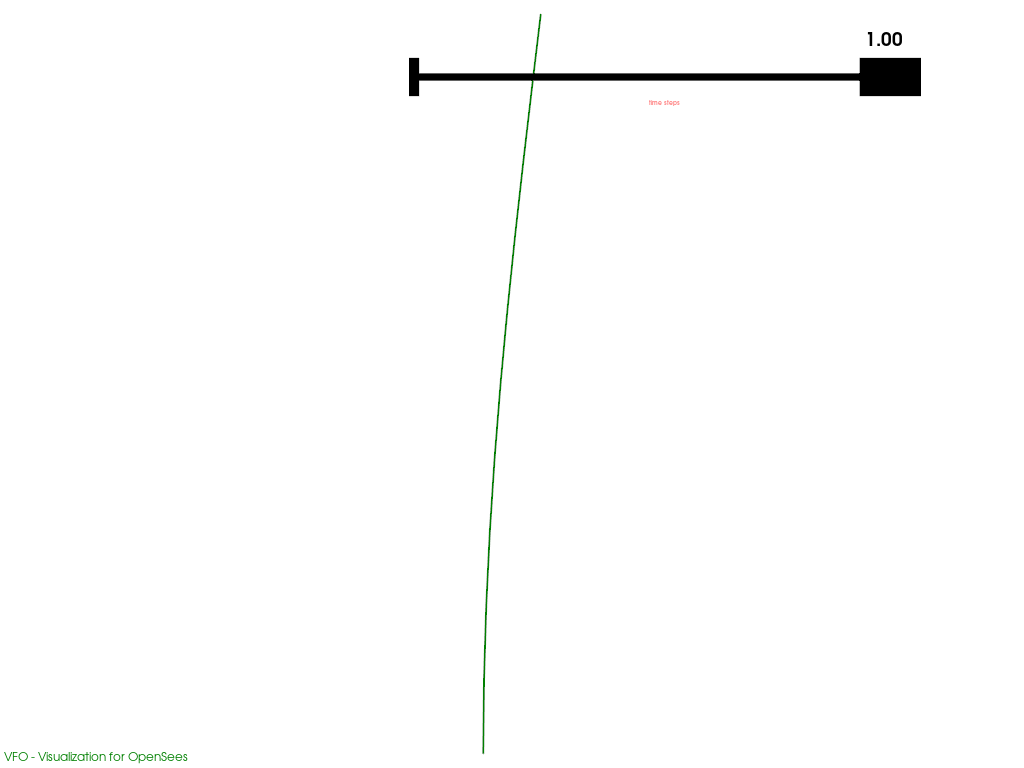

In [13]:
vfo.plot_deformedshape(
    model='cant_col_p_delta', 
    loadcase="static", 
    line_width=2,
    filename='cant_col_p_delta_deformed'
)

from IPython.display import Image, display

display(Image(filename='cant_col_p_delta_deformed.png'))

## SAP2000 Analysis

1. Define Geometry

    The geometry is defined in XZ-plane with the dimensions defined earlier. The base support (node 1) is defined as fixed and the top (node 2) will be free. To be able to obtain an accurate result, the column is meshed into a minimum four segments during the analysis.

    <img src="../assets/img/structure/cant_col_p_delta/cant_col_p_delta_01.png" alt="Define geometry and mesh size" width=600px>


2. Define Load Patterns:

    The axial load is defined as `DL` and the laterl load is defined as `NL`. Note that the `Self Weight Multiplier` for the `DL` is set to zero.

    <img src="../assets/img/structure/cant_col_p_delta/cant_col_p_delta_05.png" alt="Define load pattern" width=600>

3. Define Load Cases:

    The `DL` load pattern is a static load patter. However, the `NL` load case is defined as a nonlinear load pattern since P-Delta is a nonlinear analysis. 

    :::{note}

    Note that superimposition cannot be used in a nonlinear analysis, thus all the applicable load patterns must be considered simultaneously in the nonlinear analysis.
    
    :::

    <img src="../assets/img/structure/cant_col_p_delta/cant_col_p_delta_04.png" alt="Define load cases" width=600>

    As shown in the figure below, the `DL` and `NL` load patterns are applied together with scale factors of one for the P-Delta analysis.

    <img src="../assets/img/structure/cant_col_p_delta/cant_col_p_delta_06.png" alt="P-Delta load pattern" width=600>

4. Perform Analysis

    The following figures show the result of the P-Delta analysis. The values obtained for drift and moments are

    * Second-order free-end drift = 2.5712 in
    * Second-order base moment = 846 kip-in

    Both the free-end drift and the moment at the base are within 0.5% of the AISC benchmark results.

    <img src="../assets/img/structure/cant_col_p_delta/cant_col_p_delta_02.png" alt="Drift, Shear, and Moment diagram" height=500px>




